In [20]:
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

STEP = 10 / 4  # 2.5, to map 4x4 coords (0..4) to drawing coords (0..10)

def draw_grids_on_axis(ax):
    """Draw the 10x10 (black) and 4x4 (red) grids on the given axis."""
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal')
    ax.axis('off')

    # 10x10 grid (black)
    for i in range(11):
        ax.plot([i, i], [0, 10], linewidth=1, color='black', zorder=1)  # vertical
        ax.plot([0, 10], [i, i], linewidth=1, color='black', zorder=1)  # horizontal

    # 4x4 grid (red, thicker)
    for i in range(5):
        x = i * STEP
        ax.plot([x, x], [0, 10], linewidth=2, color='red', zorder=2)    # vertical
        ax.plot([0, 10], [x, x], linewidth=2, color='red', zorder=2)    # horizontal


def map_points_4x4_to_canvas(points_4x4):
    """Map [(x,y), ...] in 0..4 space to 0..10 drawing space."""
    return [(x * STEP, y * STEP) for (x, y) in points_4x4]


def plot_triangle_on_axis(ax, triangle_4x4, tri_edge='blue', tri_face='cyan', tri_alpha=0.35):
    """Draw a single triangle (given in 4x4 coords) onto the axis over the grids."""
    draw_grids_on_axis(ax)

    mapped = map_points_4x4_to_canvas(triangle_4x4)

    # Triangle polygon (ensure it draws above the grids)
    poly = Polygon(
        mapped,
        closed=True,
        edgecolor=tri_edge,
        facecolor=(tri_face if tri_face else 'none'),
        linewidth=2,
        alpha=(tri_alpha if tri_face else 1.0),
        zorder=5
    )
    ax.add_patch(poly)

    # Vertex markers + labels (to help verify correctness)
    #xs, ys = zip(*mapped)
    #ax.scatter(xs, ys, s=20, zorder=6)
    #for (x4, y4), (xc, yc) in zip(triangle_4x4, mapped):
    #    ax.text(xc + 0.15, yc + 0.15, f"({x4},{y4})", fontsize=7, zorder=7)


def draw_all_triangles_subplot(triangle_dictionary, cols=4, savepath="triangles_subplot.png"):
    """Create a multi-subplot figure with all triangles from the dictionary."""
    names = list(triangle_dictionary.keys())
    n = len(names)
    rows = math.ceil(n / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(3.2 * cols, 3.2 * rows), dpi=200)
    if rows == 1 and cols == 1:
        axes = [[axes]]
    elif rows == 1:
        axes = [axes]
    elif cols == 1:
        axes = [[ax] for ax in axes]

    # Flatten axis grid for easy iteration
    flat_axes = [ax for row in axes for ax in row]

    for ax, name in zip(flat_axes, names):
        coords_4x4 = triangle_dictionary[name]
        plot_triangle_on_axis(ax, coords_4x4, tri_edge='blue', tri_face='cyan', tri_alpha=0.35)
        ax.set_title(name, fontsize=9, pad=4)

    # Hide any extra axes if grid has more slots than triangles
    for ax in flat_axes[len(names):]:
        ax.axis('off')

    plt.tight_layout()
    plt.savefig(savepath, bbox_inches='tight', pad_inches=0.1)
    plt.show()
    plt.close()
    return savepath

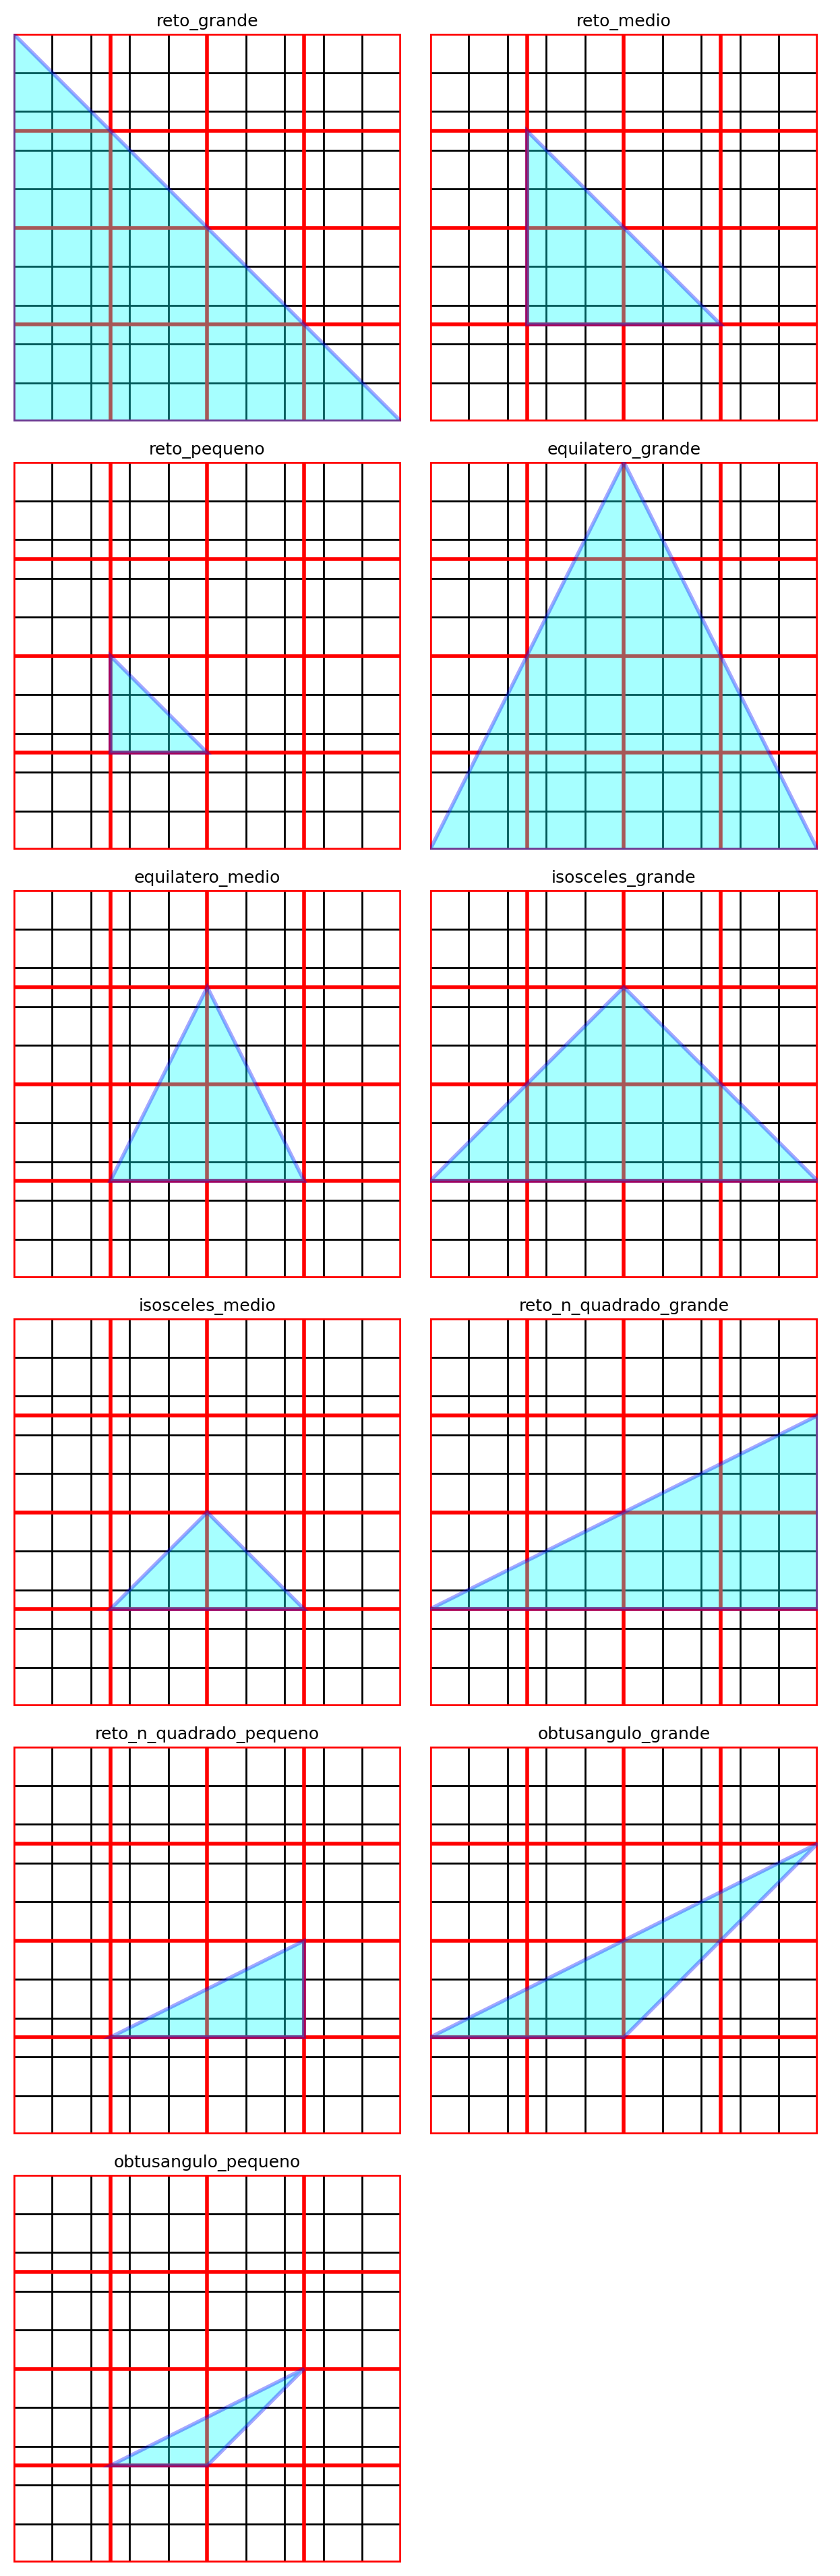

Saved: grid_10x10_4x4_all_triangles.png


In [22]:
# -------------------------
# Your main (updated usage)
# -------------------------
triangle_dictionary = {
    "reto_grande": [(0,0),(4,0),(0,4)],
    "reto_medio": [(1,1),(3,1),(1,3)],
    "reto_pequeno": [(1,1),(2,1),(1,2)],
    "equilatero_grande": [(0,0),(4,0),(2,4)],
    "equilatero_medio": [(1,1),(3,1),(2,3)],
    "isosceles_grande": [(0,1),(4,1),(2,3)],
    "isosceles_medio": [(1,1),(3,1),(2,2)],
    "reto_n_quadrado_grande": [(0,1),(4,1),(4,3)],
    "reto_n_quadrado_pequeno": [(1,1),(3,1),(3,2)],
    "obtusangulo_grande": [(0,1),(2,1),(4,3)],
    "obtusangulo_pequeno": [(1,1),(2,1),(3,2)],
}

# Produce a single image with all triangles as subplots (4 columns wide)
output_path = draw_all_triangles_subplot(triangle_dictionary, cols=2, savepath="grid_10x10_4x4_all_triangles.png")
print(f"Saved: {output_path}")

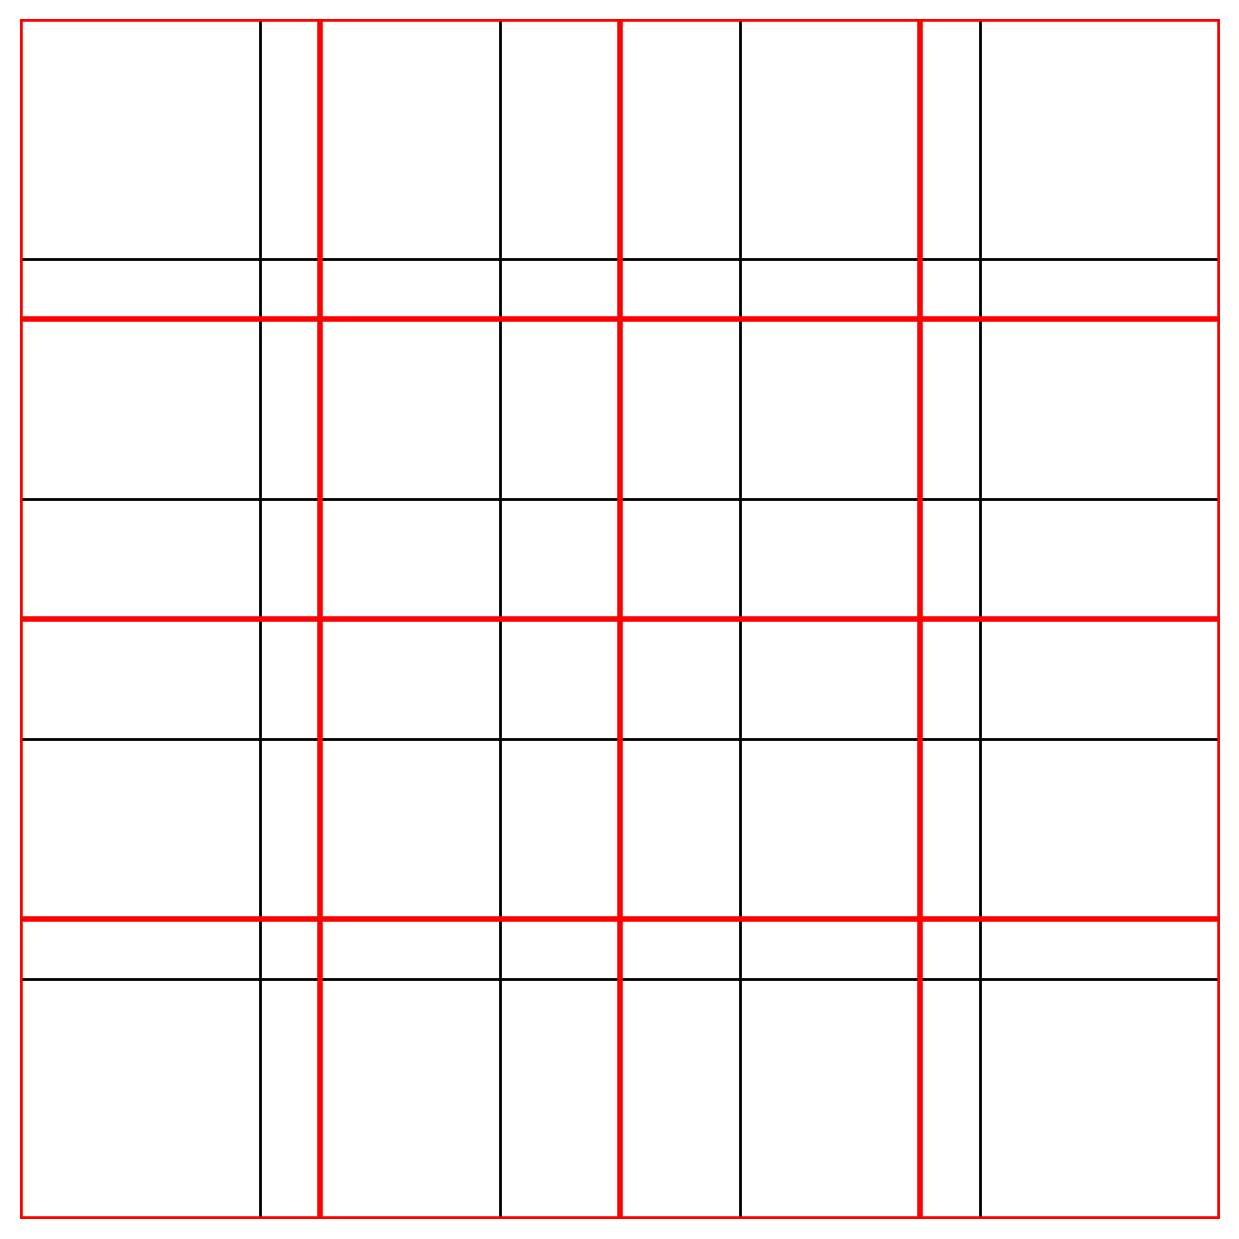

In [26]:
import matplotlib.pyplot as plt

def save_transparent_overlaid_grid(
    savepath="grid_overlay_transparent.png",
    fine_divs=5, fine_color='black', fine_lw=1,
    coarse_divs=4, coarse_color='red', coarse_lw=2,
    size_inches=6, dpi=200
):
    # Square canvas in 0..10 space
    fig, ax = plt.subplots(figsize=(size_inches, size_inches), dpi=dpi)
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal')
    ax.axis('off')

    # Transparent background
    fig.patch.set_alpha(0)
    ax.set_facecolor((0, 0, 0, 0))

    # Remove margins and padding
    ax.margins(0)
    plt.subplots_adjust(left=0, right=1, top=1, bottom=0)

    # Draw fine grid (10x10)
    step_f = 5 / fine_divs
    for i in range(fine_divs + 1):
        x = i * step_f
        ax.plot([x, x], [0, 5], linewidth=fine_lw, color=fine_color, zorder=1)
        ax.plot([0, 5], [x, x], linewidth=fine_lw, color=fine_color, zorder=1)

    # Draw coarse grid (4x4)
    step_c = 5 / coarse_divs
    for i in range(coarse_divs + 1):
        x = i * step_c
        ax.plot([x, x], [0, 5], linewidth=coarse_lw, color=coarse_color, zorder=2)
        ax.plot([0, 5], [x, x], linewidth=coarse_lw, color=coarse_color, zorder=2)

    plt.savefig(savepath, bbox_inches='tight', pad_inches=0, transparent=True)
    plt.show()
    plt.close()

# Example:
save_transparent_overlaid_grid("grid_5x5_4x4_transparent.png")
